# [ VAE ] OOD Detection using FSS

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
sys.path.append(os.getcwd() + '/core/train_GLOW') 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import core.config as config
from core.model_loader import load_pretrained_VAE
from core.data_loader import TRAIN_loader, TEST_loader
from core.custom_loss import KL_div, VAE_loss_pixel
from core.fisher_utils_VAE import Calculate_fisher_VAE, Calculate_score_VAE, AUTO_VAE, Calculate_fisher_VAE_ekfac, Calculate_score_VAE_ekfac
from core.visualize import plot_hist, AUROC, plot_scores_all_layers

# fix a random seed
random.seed(2021)
np.random.seed(2021)
torch.manual_seed(2021)

# Define Global Variables & Initialize

In [2]:
# FISHER_invs : Fisher inverse matrices from calculating Fisher score (w.r.t. train-dist)
FISHERs = {'cifar10': {}, 'fmnist': {}}
         
# NORMalize_FACtors : Normalizing Factor (w.r.t. train-dist)
NORM_FACs = {'cifar10': {}, 'fmnist': {}}
             
# SCOREs : (Scalars) Scores from calculating Fisher score (w.r.t. target-dist)
SCOREs = {'cifar10': {}, 'fmnist': {}}


# VAE - CIFAR10 & FMNIST

## [1] Load the model & Parameter Selection

In [3]:
opt = config.VAE_cifar10
netE, netG = load_pretrained_VAE(option=opt.train_dist, ngf=64, nz=200, beta=1, augment='hflip', epoch=100)
netE.eval()
netG.eval()

params = {
    #'Emain0_w': netE.main[0].weight,
    #'Emain1_w': netE.main[1].weight,
    #'Emain1_b': netE.main[1].bias,
    #'Emain3_w': netE.main[3].weight,
    #'Emain4_w': netE.main[4].weight,
    #'Emain4_b': netE.main[4].bias,
    #'Emain6_w': netE.main[6].weight,
    #'Emain7_w': netE.main[7].weight,
    #'Emain7_b': netE.main[7].bias,
    'Econv1_w': netE.conv1.weight,
    #'Econv1_b': netE.conv1.bias,
    #'Econv2_w': netE.conv2.weight,
    #'Econv2_b': netE.conv2.bias,
    #'Gmain0_w': netG.main[0].weight,
    #'Gmain1_w': netG.main[1].weight,
    #'Gmain1_b': netG.main[1].bias,
    #'Gmain3_w': netG.main[3].weight,
    #'Gmain4_w': netG.main[4].weight,
    #'Gmain4_b': netG.main[4].bias,
    #'Gmain6_w': netG.main[6].weight,
    #'Gmain7_w': netG.main[7].weight,
    #'Gmain7_b': netG.main[7].bias,
    #'Gmain9_w': netG.main[9].weight,
}


## [2] Compute ROSE via EKFAC

Files already downloaded and verified


Calculate A, B:   0%|                                                                                                                                                                                                                           | 0/50000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Fisher VAE by EKFAC:  20%|██████████████████████████████████████▍                                                                                                                                                         | 9999/50000 [01:11<04:44, 140.73step/s]


Files already downloaded and verified


Calculate Score VAE:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 4999/10000 [00:44<00:44, 113.14step/s]


Average Inference Time : 0.0088414402 seconds
Average #Images Processed : 113.10374524729579 Images


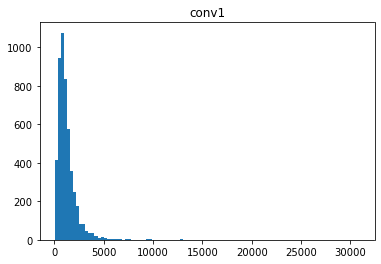

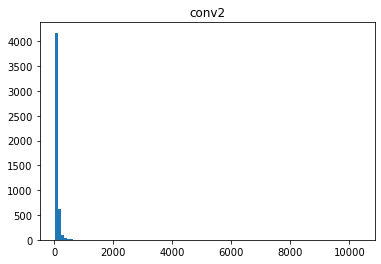

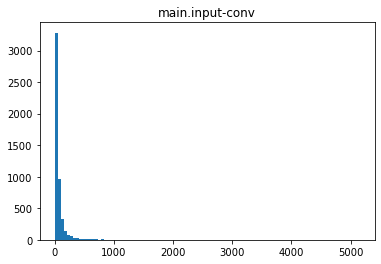

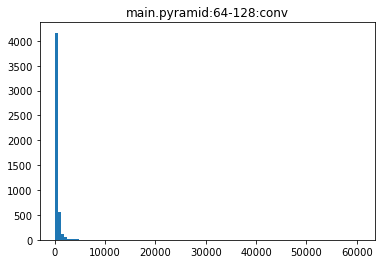

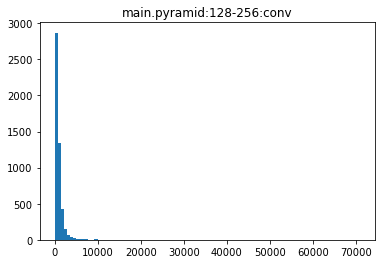

Using downloaded and verified file: ../data\test_32x32.mat


Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/26032 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  19%|██████████████████████████████████████▊                                                                                                                                                                   | 4999/26032 [00:44<03:06, 112.96step/s]


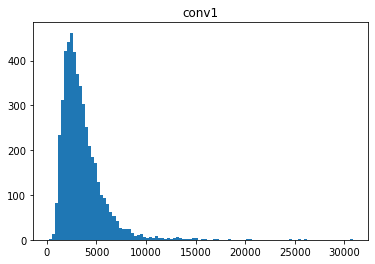

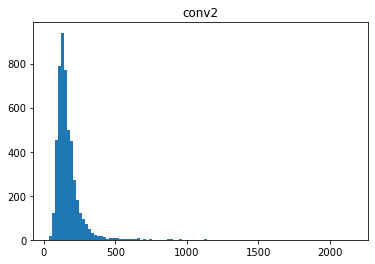

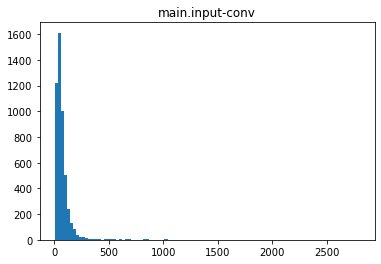

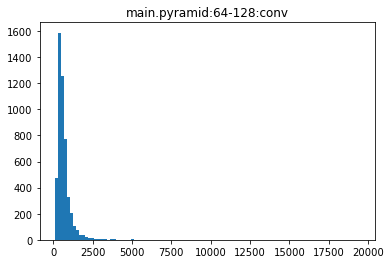

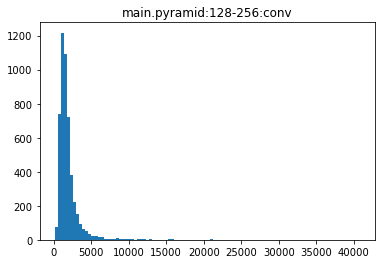

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/19141 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  26%|████████████████████████████████████████████████████▊                                                                                                                                                     | 4999/19141 [00:49<02:19, 101.61step/s]


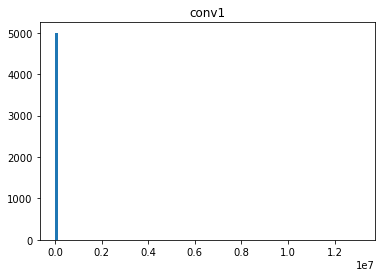

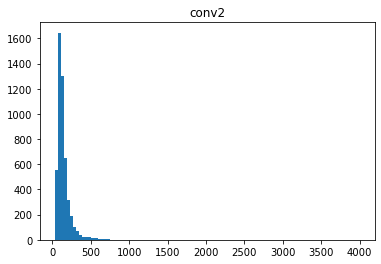

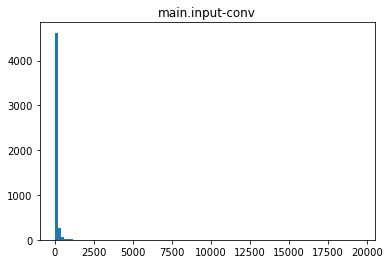

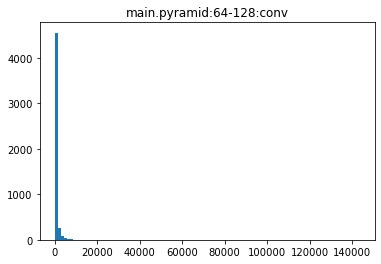

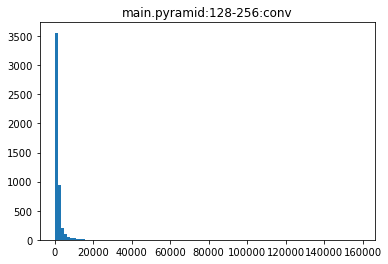

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  50%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                     | 4999/10000 [00:52<00:52, 95.29step/s]


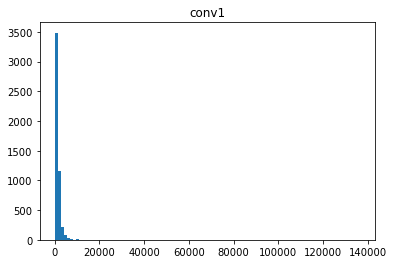

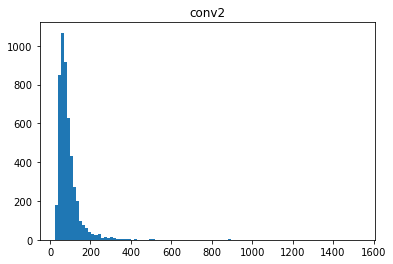

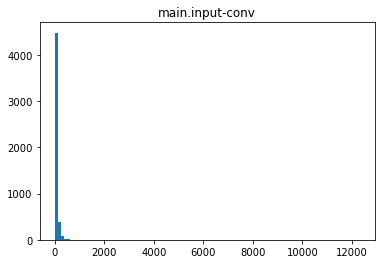

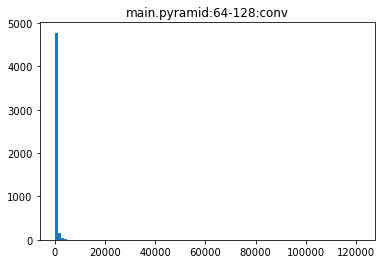

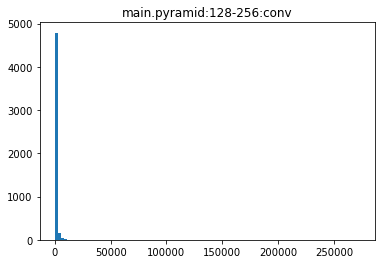

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 4999/10000 [00:44<00:44, 112.60step/s]


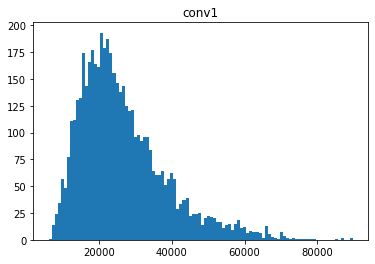

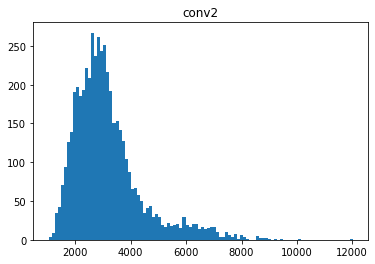

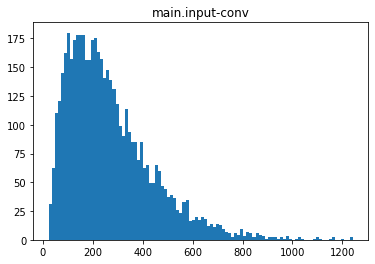

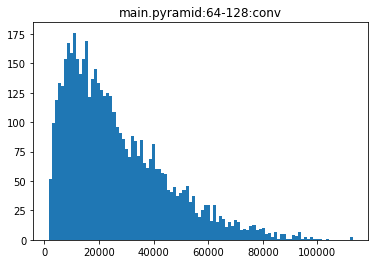

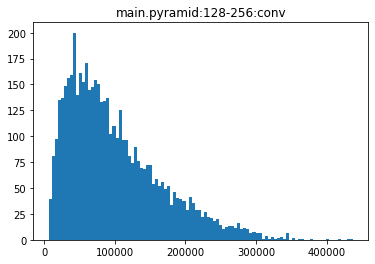

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 4999/10000 [00:44<00:44, 112.67step/s]


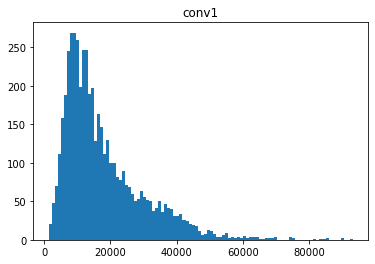

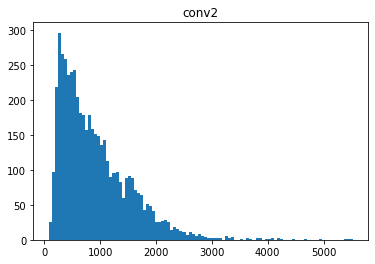

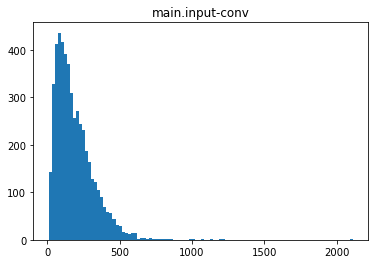

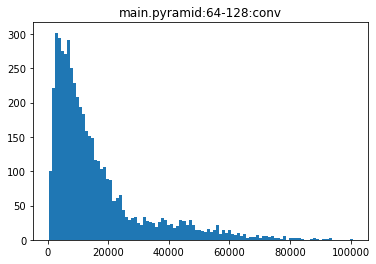

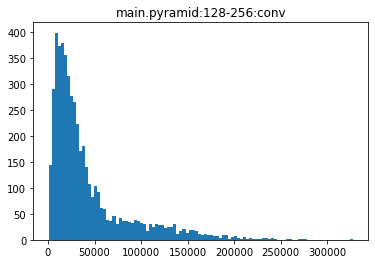

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 4999/10000 [00:44<00:44, 112.97step/s]


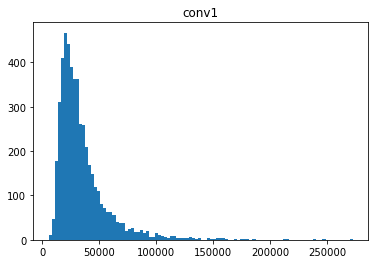

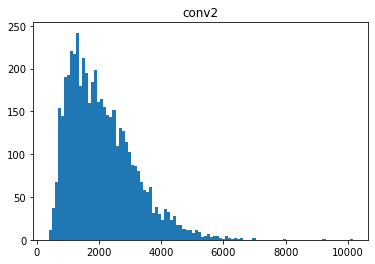

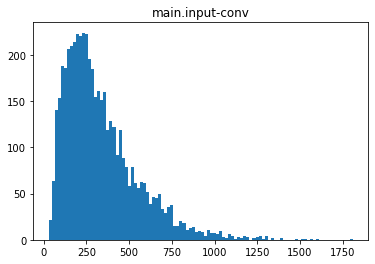

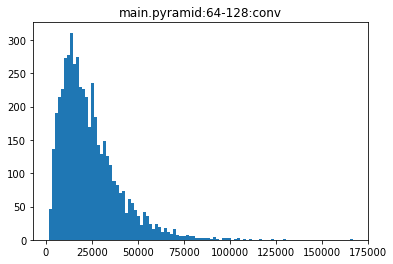

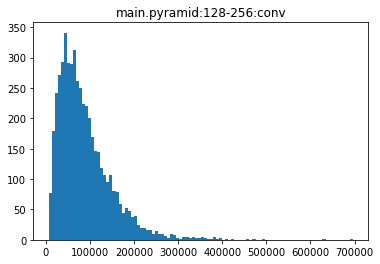

Files already downloaded and verified


Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/13180 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  38%|████████████████████████████████████████████████████████████████████████████▌                                                                                                                             | 4999/13180 [00:46<01:16, 106.79step/s]


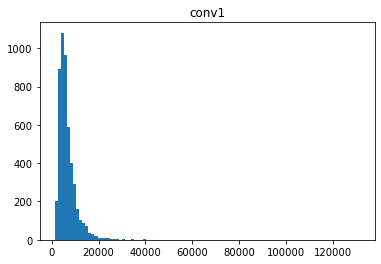

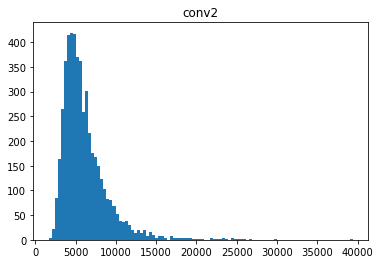

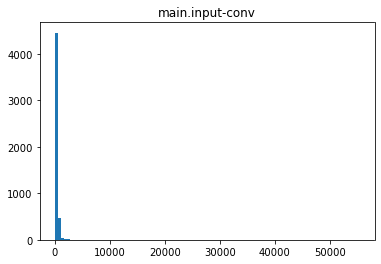

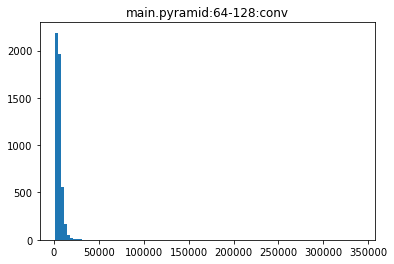

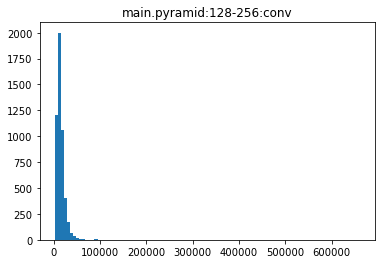

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/18724 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  27%|█████████████████████████████████████████████████████▉                                                                                                                                                    | 4999/18724 [00:46<02:07, 107.26step/s]


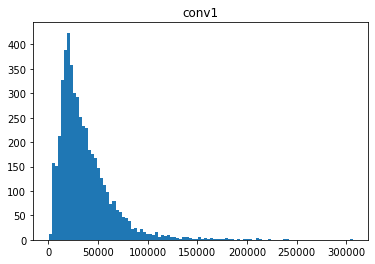

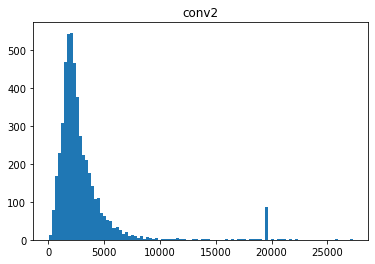

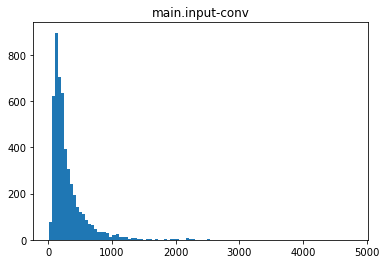

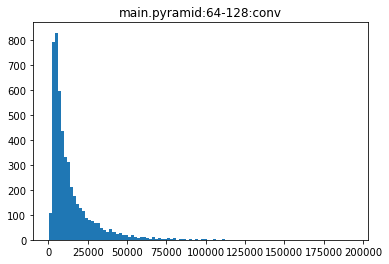

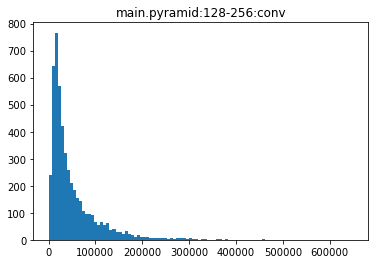

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 4999/10000 [00:43<00:43, 114.71step/s]


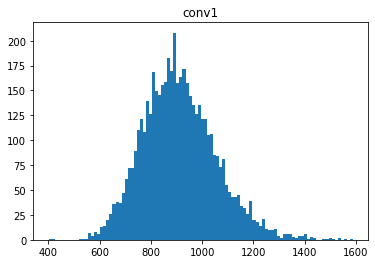

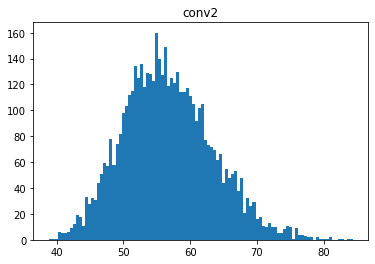

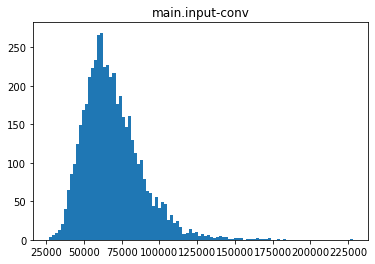

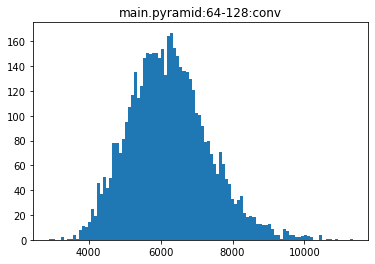

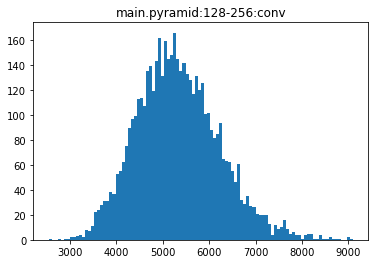

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 4999/10000 [00:43<00:43, 114.55step/s]


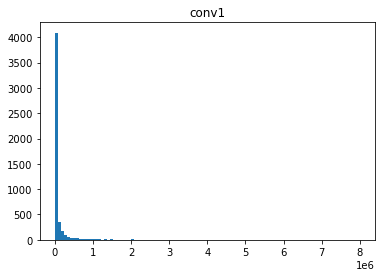

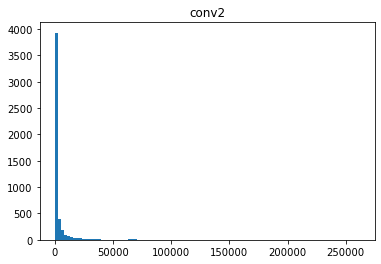

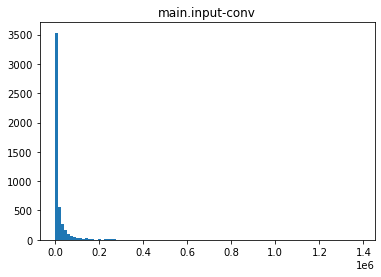

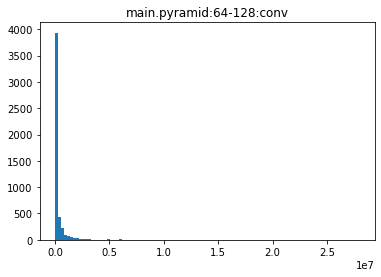

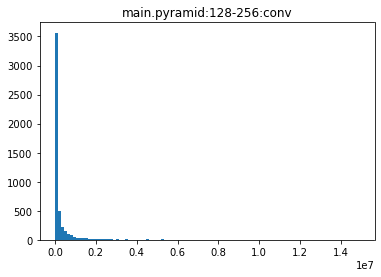

Calculate Score VAE:   0%|                                                                                                                                                                                                                      | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score VAE:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 4999/10000 [00:46<00:46, 108.11step/s]


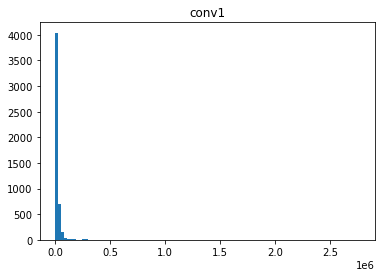

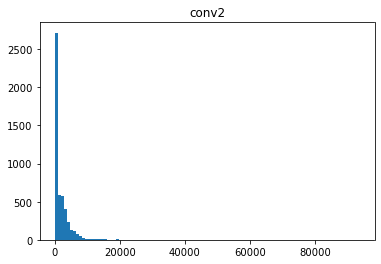

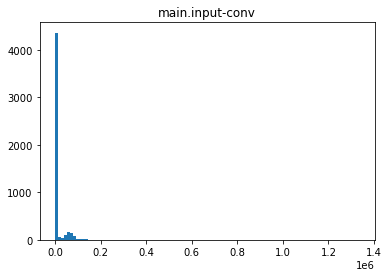

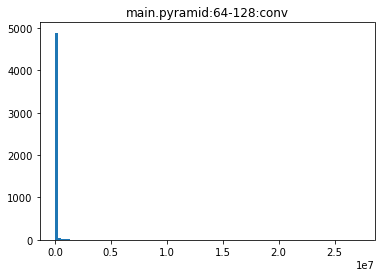

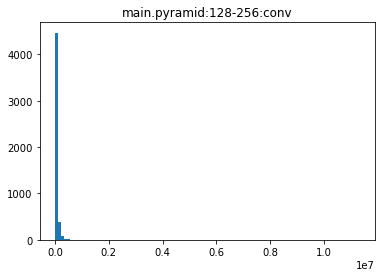

{'cifar10': 0.5,
 'svhn': 0.89511508,
 'celeba': 0.7717537999999999,
 'lsun': 0.5412227599999999,
 'mnist': 0.9995455599999999,
 'fmnist': 0.996084,
 'kmnist': 0.9995383999999999,
 'omniglot': 0.9948197599999999,
 'notmnist': 0.99800784,
 'noise': 0.9997976399999999,
 'constant': 0.9896844000000001,
 'overall': 0.91682532}

In [4]:
method = 'ekfac(max)'
auroc = {}
SCOREs = {}
trainloader = TRAIN_loader(opt.train_dist, shuffle=True)
U_A, U_B, S, mean, std = Calculate_fisher_VAE_ekfac(netE, netG, trainloader, params, opt, max_iter=10000)

for ood in opt.ood_list:
    testloader = TEST_loader(opt.train_dist, ood, shuffle=True)
    score = Calculate_score_VAE_ekfac(netE, netG, testloader, params, opt, U_A, U_B, S, ood, max_iter=5000)
    temp = []
    for name in score.keys():
        a = np.array(score[name])
        #for name2, module in netE.named_modules():
        #    if name == name2:
        #        k = 0
        #        for param in module.parameters():
        #            k += np.array(param.shape).prod()
        a = (a - mean[name]) / std[name]  
        temp.append(a) 
        plt.figure()
        plt.title(f'{opt.train_dist}_{ood}_{name}')
        plt.hist(a, bins=100)
        plt.show()
    score = np.max(np.concatenate(temp, 1), 1)
    SCOREs[ood] = score
    args = [SCOREs[opt.train_dist], SCOREs[ood]]
    labels = [opt.train_dist, ood]
    auroc[ood] = AUROC(*args, labels=labels, verbose=False)
auroc
    

## [3] Save the result score (see the directory npy/ROSE)

In [5]:
for ood in opt.ood_list:
    score_path = f'./npy/ROSE/VAE_{opt.train_dist}/{opt.train_dist}_{ood}_{method}.npy'
    np.save(score_path, SCOREs[ood])

## [4] View scores for each layer

In [8]:
# Just show scores
# plot_scores_all_layers(train_dist, params, SCOREs, opt, save=True)


## [5] Check the reconstruction ability of VAE

Files already downloaded and verified


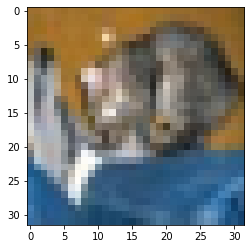

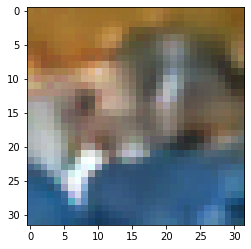

In [9]:
# Check the ability of reconstruction
loader = TEST_loader('cifar10', 'cifar10')
for i,(x,_) in enumerate(loader):
    z, mu, logvar = netE(x.cuda())
    y = netG(z)
    plt.figure()
    plt.imshow(x[0].permute(1, 2, 0).detach().cpu())
    plt.show()
    plt.figure()
    plt.imshow(torch.argmax(y, 4)[0].permute(1, 2, 0).detach().cpu())
    plt.show()
    if i == 0:
        break